# wide&deep模型之多输入多输出

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
matplotlib 2.2.2
numpy 1.19.2
pandas 0.23.0
sklearn 0.23.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

# 获取训练集和测试集
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
# 对x与y进行划分训练集、验证集
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [11]:
from sklearn.preprocessing import StandardScaler
# 归一化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_valid_scaled.shape)
print(x_test_scaled.shape)

print(x_train_scaled[:, :5].shape)
print(x_train_scaled[:, 2:].shape)

(11610, 8)
(3870, 8)
(5160, 8)
(11610, 5)
(11610, 6)


In [8]:
# 多输入
input_wide = keras.layers.Input(shape=[5])
print(input_wide.shape)
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
# 多个参数的输入
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output])
        

model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
model.summary()

(None, 5)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________

In [12]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    y_train,
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 103us/sample - loss: 0.9643 - val_loss: 0.6935
Epoch 2/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6741 - val_loss: 0.5571
Epoch 3/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5020 - val_loss: 0.4932
Epoch 4/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4539 - val_loss: 0.4583
Epoch 5/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4298 - val_loss: 0.4403
Epoch 6/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4144 - val_loss: 0.4253
Epoch 7/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4039 - val_loss: 0.4173
Epoch 8/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3985 - val_loss: 0.4728
Epoch 9/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.39

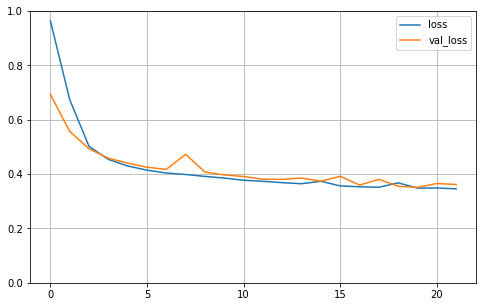

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [14]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.35264835112778714